# Problem 2
**import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta

**load the data**

In [2]:
df=pd.read_parquet(r"C:\Users\Barry\Desktop\projects\akaike assignment\Structured_Data_Assignment\Structured_Data_Assignment\train.parquet")

In [3]:
df.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220868 entries, 0 to 29080911
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Patient-Uid  object        
 1   Date         datetime64[ns]
 2   Incident     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 98.3+ MB


# Target Drug dropoff rate analysis

In [5]:
df['Patient-Uid'].nunique()

27033

In [6]:
# Calculate the ideal treatment duration rate in months  
ideal_duration = 12
ideal_duration_months = ideal_duration * 30 / 365

In [7]:
# Filter the dataframe to only include rows where the drug is the "Target Drug"
target_drug = df[df['Incident'] == 'TARGET DRUG']

In [8]:
target_drug.shape

(67218, 3)

In [9]:
# calculate the dropoff count 
dropoff_count = target_drug.groupby(pd.Grouper(key='Date', freq='M'))['Patient-Uid'].nunique()
dropoff_count.head()

Date
2017-02-28     1
2017-03-31     2
2017-04-30     1
2017-05-31     5
2017-06-30    11
Freq: M, Name: Patient-Uid, dtype: int64

In [10]:
# Calculate the dropoff rate 
dropoff_rate = dropoff_count / ideal_duration_months

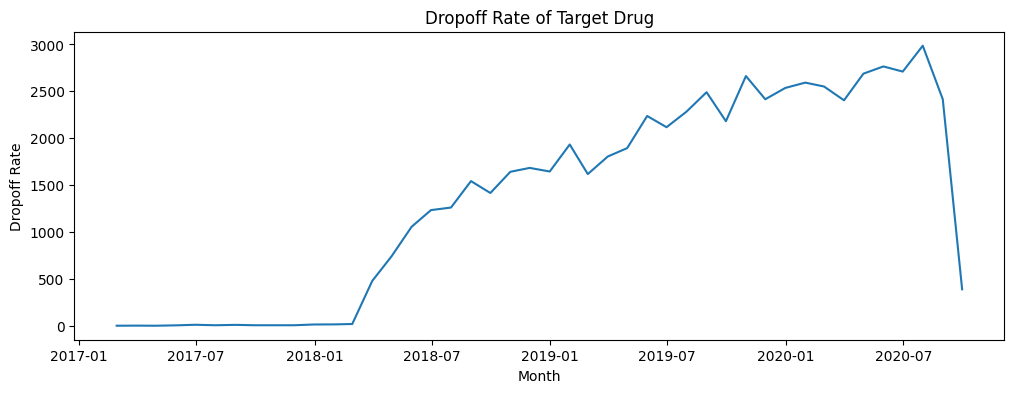

In [11]:
#Plot the dropoff rate over time:
fig = plt.figure(figsize=(12, 4))
plt.plot(dropoff_rate)
plt.xlabel('Month')
plt.ylabel('Dropoff Rate')
plt.title('Dropoff Rate of Target Drug')
plt.show()

In [12]:
# Generate insights on what events are driving patients to stop taking the "Target Drug",
incident_dropoff_count = df.groupby('Incident')['Patient-Uid'].nunique()

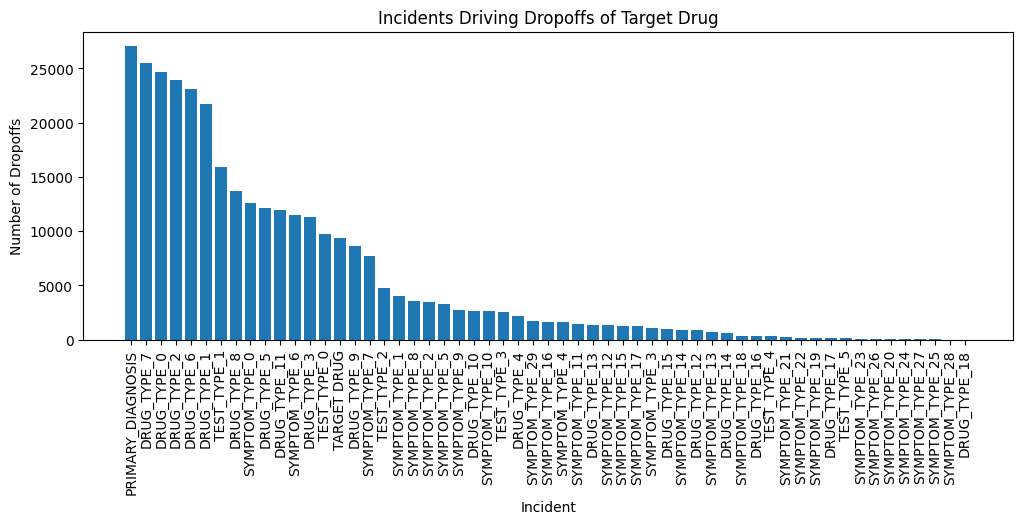

In [13]:
# Sort the incident dropoff count in descending order to see which incidents have the highest number of dropoffs,
sorted_incident_dropoff = incident_dropoff_count.sort_values(ascending=False)

#Plot the sorted incident dropoff count as a bar chart
fig = plt.figure(figsize=(12, 4))
plt.bar(sorted_incident_dropoff.index, sorted_incident_dropoff)
plt.xticks(rotation=90)
plt.xlabel('Incident')
plt.ylabel('Number of Dropoffs')
plt.title('Incidents Driving Dropoffs of Target Drug')
plt.show()


**Drugs resulting in  Drop  off of  "Target Drud" in take are :**
 1) DRUG_TYPE_7
 2) DRUG_TYPE_0
 3) DRUG_TYPE_6

**Symptoms resulting in Drop off of "Target Drud" in take are :**
1) SYMPTOM_TYPE_0
2) SYMPTOM_TYPE_6
3) SYMPTOM_TYPE_7